In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import keras.backend as K
# %pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
df = pd.read_csv('../../Dataset/cleaned_used_cars_v1.csv')

In [37]:
df.shape

(207735, 12)

In [38]:
# dummies = pd.get_dummies(df.drop(['dateCrawled','lastSeen','dateCreated','name'], axis=1), columns=['seller', 'offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage'])
# df_preprocessed = pd.concat([df.drop(['price','index','dateCrawled','lastSeen','yearOfRegistration','monthOfRegistration','nrOfPictures','postalCode',
#              'name','seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], axis=1),
#                              dummies], axis=1)
onehot_columns = ['abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage']
onehot_df = df[onehot_columns]
onehot_df = pd.get_dummies(onehot_df, columns = onehot_columns)
score_onehot_drop = df.drop(onehot_columns, axis = 1)
score_onehot = pd.concat([score_onehot_drop, onehot_df], axis = 1)
df_preprocessed = score_onehot

In [39]:
df_preprocessed.shape

(207735, 298)

In [40]:
df_preprocessed

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_control,abtest_test,vehicleType_compact car,vehicleType_convertible,vehicleType_other,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,1500,2001,75,150000,6,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3600,2008,69,90000,7,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,650,1995,102,150000,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2200,2004,109,150000,8,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1980,50,40000,7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207730,7900,2010,140,150000,7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
207731,3999,2005,3,150000,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
207732,3200,2004,225,150000,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207733,1199,2000,101,125000,3,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [41]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [44]:
X = df_preprocessed.astype(float).to_numpy()
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1))

print('--------------------Compile------------------------------------')
model.compile(optimizer='adam', loss='mse', metrics=['mae', r2])

early_stop = EarlyStopping(monitor='val_loss', patience=100)

print('--------------------Fit------------------------------------')
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=1000, epochs=100)

print('--------------------Evaluate------------------------------------')
score = model.evaluate(X_test, y_test)
print(f'Deep Learning Regression Mean Absolute Error: {score[1]:.2f}')
print(f'Deep Learning Regression R-squared Score: {score[2]:.2f}')

--------------------Compile------------------------------------
--------------------Fit------------------------------------
Epoch 1/100
133/133 [==============================] - 2s 9ms/step - loss: 125187219456.0000 - mae: 6018.9751 - r2: 0.0248 - val_loss: 1567726720.0000 - val_mae: 3011.8113 - val_r2: 0.5867
Epoch 2/100
133/133 [==============================] - 1s 6ms/step - loss: 63201153024.0000 - mae: 2235.6221 - r2: 0.8382 - val_loss: 548856000.0000 - val_mae: 970.7213 - val_r2: 0.9284
Epoch 3/100
133/133 [==============================] - 1s 7ms/step - loss: 16525259776.0000 - mae: 1381.1147 - r2: 0.9528 - val_loss: 20851586.0000 - val_mae: 682.4861 - val_r2: 0.9821
Epoch 4/100
133/133 [==============================] - 1s 7ms/step - loss: 1186901632.0000 - mae: 580.3881 - r2: 0.9890 - val_loss: 2154230.7500 - val_mae: 95.0462 - val_r2: 0.9993
Epoch 5/100
133/133 [==============================] - 1s 6ms/step - loss: 69131656.0000 - mae: 291.5303 - r2: 0.9963 - val_loss: 13301

In [45]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                19136     
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 21,761
Trainable params: 21,761
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.get_weights()

[array([[-0.14744666,  0.08674849, -0.08057525, ...,  0.15763694,
         -0.00771078,  0.00720303],
        [ 0.05702386, -0.07728159,  0.01726462, ...,  0.04634326,
         -0.05255947,  0.2906706 ],
        [-0.04883688, -0.01255938,  0.05618089, ..., -0.03591469,
         -0.04607699,  0.34181568],
        ...,
        [-0.10261941, -0.45108917,  0.10822842, ..., -0.45131236,
         -0.12507193,  0.40654588],
        [-0.08057839, -0.07742716, -0.00409684, ..., -0.00974939,
         -0.05680677,  0.109933  ],
        [ 0.20014514, -2.435339  , -0.06169742, ..., -2.682664  ,
          0.07057214,  2.4524395 ]], dtype=float32),
 array([-1.73579995e-02, -5.16363196e-02,  0.00000000e+00, -6.93240017e-02,
         2.22100429e-02, -8.63128826e-02,  0.00000000e+00, -1.15258984e-01,
        -1.72503188e-01,  2.58379906e-01, -1.84694245e-01, -5.32610081e-02,
        -5.97820133e-02, -4.18182798e-02,  2.22552493e-02,  0.00000000e+00,
        -1.31508261e-02, -2.08359603e-02,  0.00000000e

In [47]:
predictions = model.predict(X_test)

# Print the predicted prices
print(predictions)

1299/1299 [==============================] - 3s 2ms/step
[[149816.6   ]
 [  1553.9012]
 [  4188.591 ]
 ...
 [  2259.932 ]
 [  5555.5396]
 [ 19044.55  ]]


In [48]:
y_test

120328    145000
34901       1095
165437      4480
155406      1325
24030       1800
           ...  
155498      6700
93180        650
153338      2200
131690      6500
127733     17799
Name: price, Length: 41547, dtype: int64

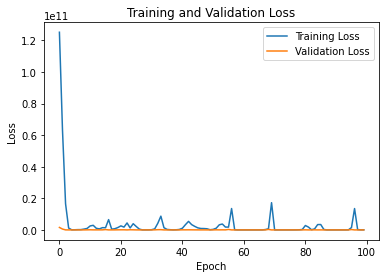

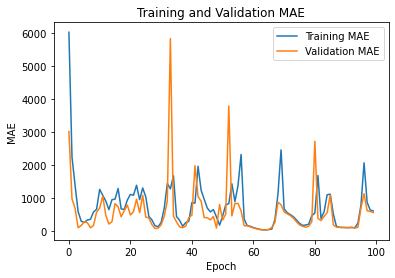

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()